In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import kurtosis, skew

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/Titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Fare'>

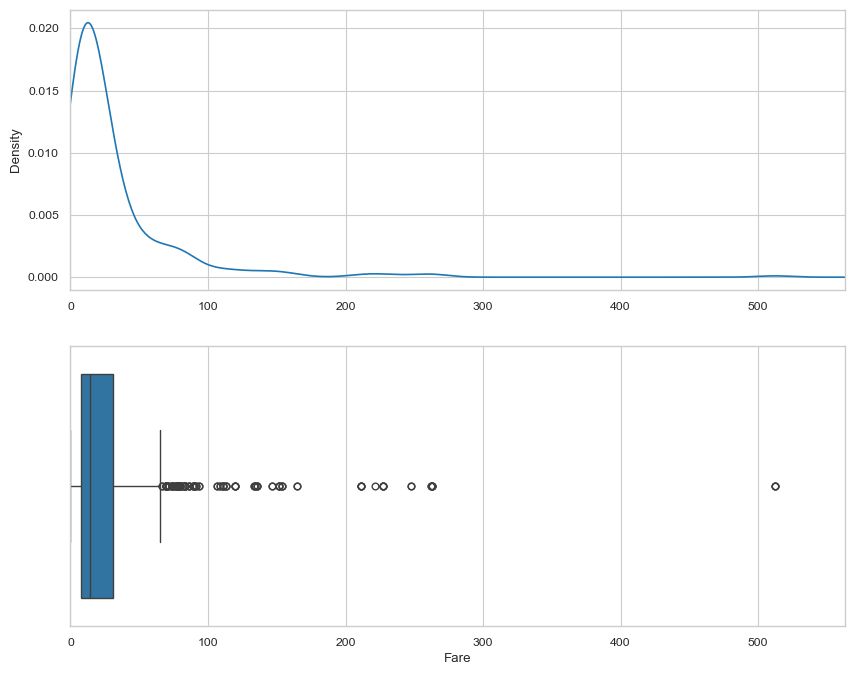

In [3]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [4]:
kurtosis_before_value = kurtosis(df[i])
print("kurtosis_before_value = ", kurtosis_before_value)
skew_before_value = skew(df[i])
print("skew_before_value = ", skew_before_value)

kurtosis_before_value =  33.20428925264474
skew_before_value =  4.7792532923723545


In [12]:
# Remove any zeros (otherwise we get (-inf))
# Alternative: we can +1 before taking log!!!
df.loc[df.Fare == 0, 'Fare'] = np.nan

# Drop NA
df.dropna(inplace=True)

# Log Transform
df['Log_' + i] = np.log(df[i])

<Axes: xlabel='Log_Fare'>

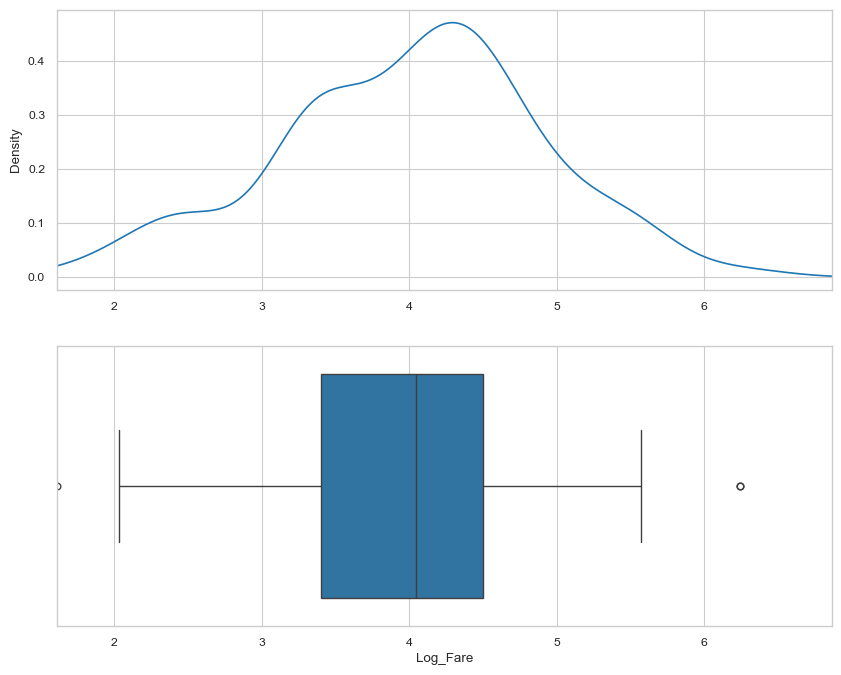

In [6]:
i = 'Log_Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [7]:
print("kurtosis_before_value = ", kurtosis_before_value)
print("skew_before_value = ", skew_before_value)
print("------")
kurtosis_after_value = kurtosis(df[i])
print("kurtosis_after_value = ", kurtosis_after_value)
skew_after_value = skew(df[i])
print("skew_after_value = ", skew_after_value)

kurtosis_before_value =  33.20428925264474
skew_before_value =  4.7792532923723545
------
kurtosis_after_value =  -0.0873951312096577
skew_after_value =  -0.20488637135036583


In [8]:
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

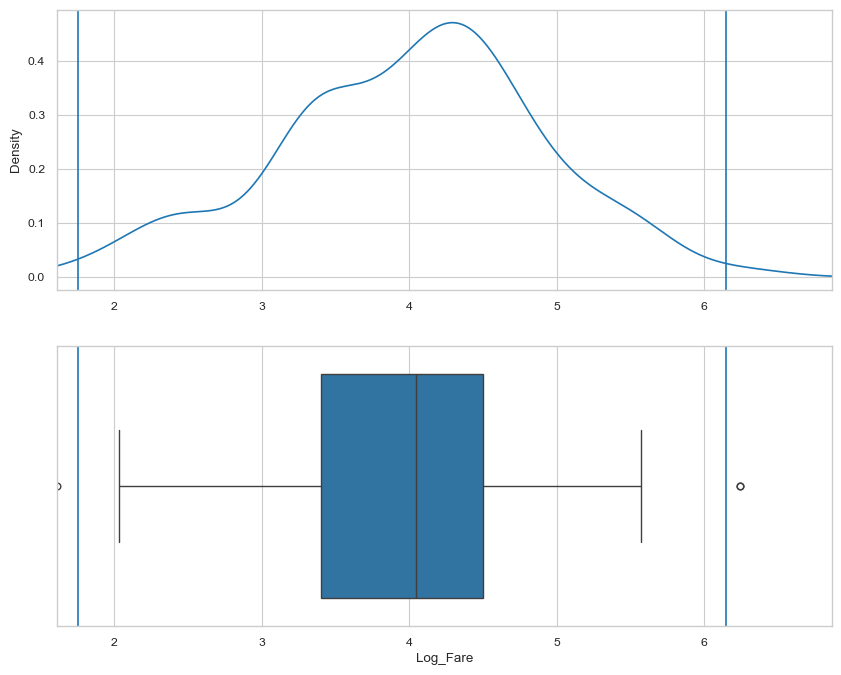

In [9]:
i = 'Log_Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [10]:
# create variable 'Outlier'
df['Outlier'] = 0

df.loc[df[i] < min, 'Outlier'] = 1
df.loc[df[i] > max, 'Outlier'] = 1

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 1 to 889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  181 non-null    int64  
 1   Survived     181 non-null    int64  
 2   Pclass       181 non-null    int64  
 3   Name         181 non-null    object 
 4   Sex          181 non-null    object 
 5   Age          181 non-null    float64
 6   SibSp        181 non-null    int64  
 7   Parch        181 non-null    int64  
 8   Ticket       181 non-null    object 
 9   Fare         181 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     181 non-null    object 
 12  Log_Fare     181 non-null    float64
 13  Outlier      181 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 21.2+ KB
None


In [13]:
df[df.Outlier == 1][['Fare', 'Log_Fare', 'Outlier']]

,Fare,Log_Fare,Outlier
679,512.3292,6.238967,1
737,512.3292,6.238967,1
872,5.0000,1.609438,1
